**Business Context**:
One of leading electricity Distribution Company would like to understand demand for electricity for
the next 1-2 years to manage the production of electricity and managing the vendors for the same. It
is one of the important exercises to getting accurate estimation of demand so that they can procure
or produce the electricity as per the demand.


**Available Data:**
The data of monthly electricity consumption available starting from January 1973 to December 2019.
We need to forecast the demand for next two years.
1. Date – Month & Year
2. Electricity Consumption – Electricity consumption in Trillion Watts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#reading the data
df=pd.read_csv('/content/drive/MyDrive/Datesets/3_time_series/Electricity Consumption.csv')

In [ ]:
df.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [ ]:
df["time"] = pd.to_datetime(df["DATE"])
df.index = df["time"]

In [ ]:
df=df.drop(columns=['DATE','time'])

In [ ]:
df

,Electricty_Consumption_in_TW
time,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


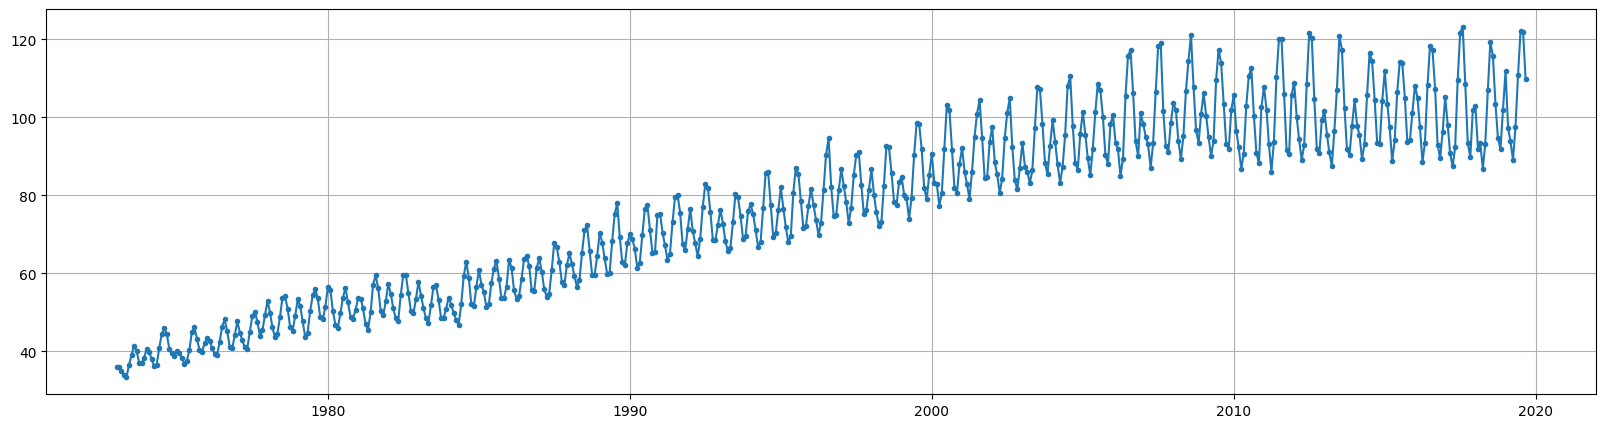

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df, marker  = ".")
plt.grid()

In [ ]:
df["month"] = pd.Series(df.index).dt.month.values
df["year"] = pd.Series(df.index).dt.year.values
df

,Electricty_Consumption_in_TW,month,year
time,,,
1973-01-01,35.9728,1,1973
1973-02-01,36.1334,2,1973
1973-03-01,35.0625,3,1973
1973-04-01,33.8416,4,1973
1973-05-01,33.5107,5,1973
...,...,...,...
2019-05-01,97.5860,5,2019
2019-06-01,110.8580,6,2019
2019-07-01,122.1014,7,2019


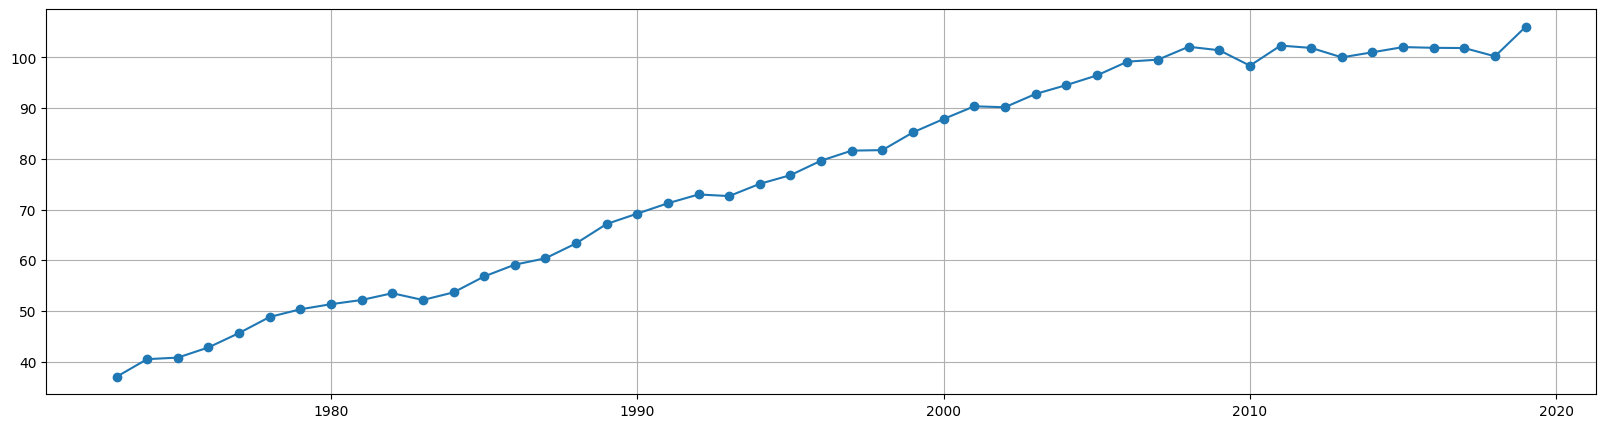

In [ ]:
#plotting year wise Electricicity consumption
plt.figure(figsize=(20,5))
plt.plot(df.groupby("year")["Electricty_Consumption_in_TW"].mean(), marker = "o")
plt.grid()

In [ ]:
year_month=df.groupby(["year", "month"])["Electricty_Consumption_in_TW"].mean().unstack()

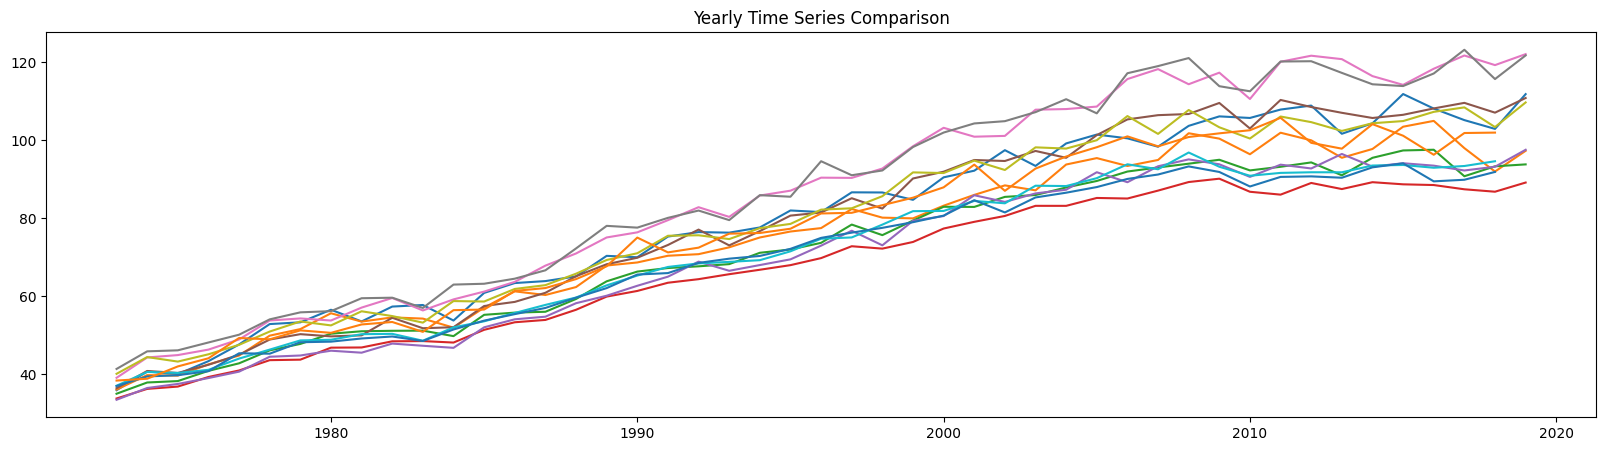

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(year_month)
plt.title("Yearly Time Series Comparison")
plt.show()

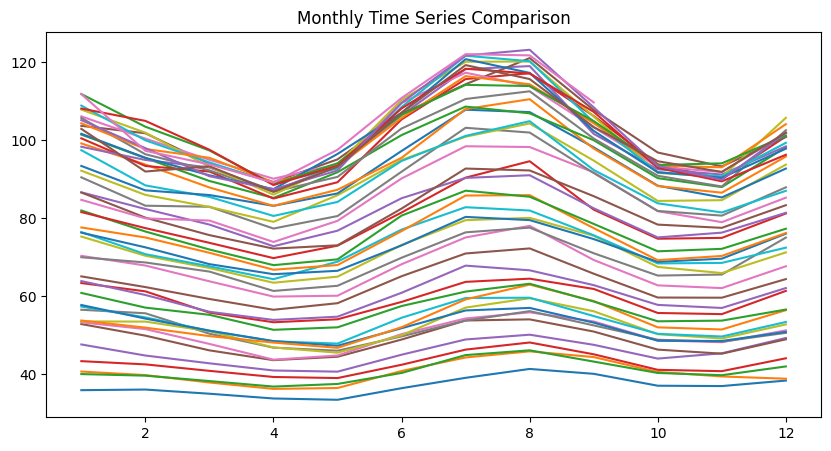

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(year_month.T)
plt.title('Monthly Time Series Comparison')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

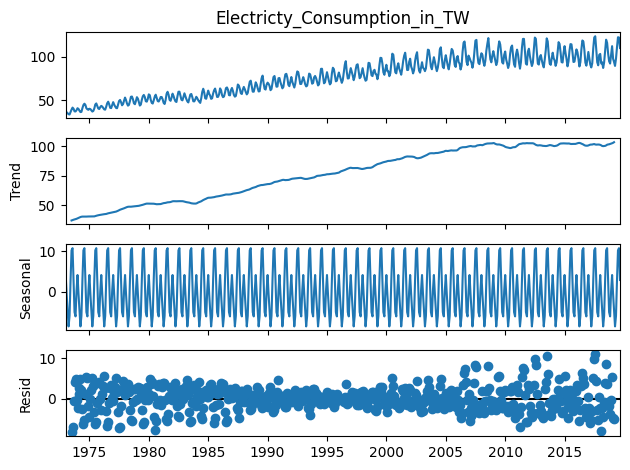

In [ ]:
# Additive decomposotion of electricity consumption: trend , seasonality and irregular component
decom = seasonal_decompose(df["Electricty_Consumption_in_TW"])
decom.plot()
plt.show()

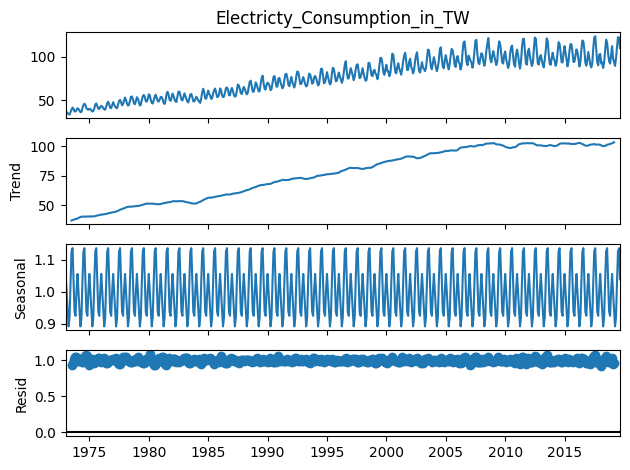

In [ ]:
#multilpicative decomposition
decom = seasonal_decompose(df["Electricty_Consumption_in_TW"],model='multiplicative' )
decom.plot()
plt.show()

In [ ]:
#Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [ ]:
def get_adfuller(ts):
    return pd.Series(adfuller(ts)[:4],index = ["Test Statistic", "p-value", "Lags Used", "Number of Observations"])

In [ ]:
get_adfuller(df["Electricty_Consumption_in_TW"])

Test Statistic             -1.740593
p-value                     0.410328
Lags Used                  15.000000
Number of Observations    545.000000
dtype: float64

In [ ]:
get_adfuller(df["Electricty_Consumption_in_TW"].diff().dropna())

Test Statistic           -7.941665e+00
p-value                   3.301344e-12
Lags Used                 1.400000e+01
Number of Observations    5.450000e+02
dtype: float64

<Axes: xlabel='time'>

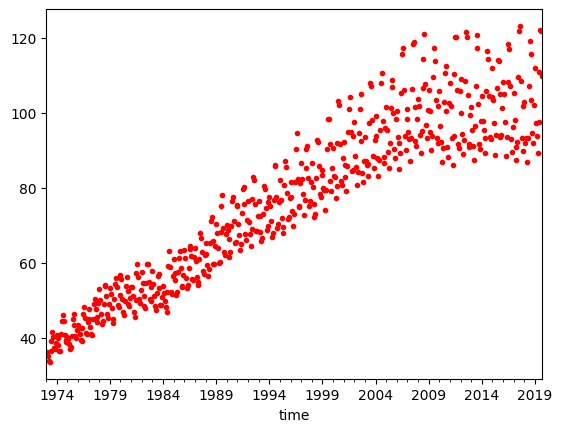

In [ ]:
df["Electricty_Consumption_in_TW"].plot(style = "r.")

In [ ]:
#plotting ACF and PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

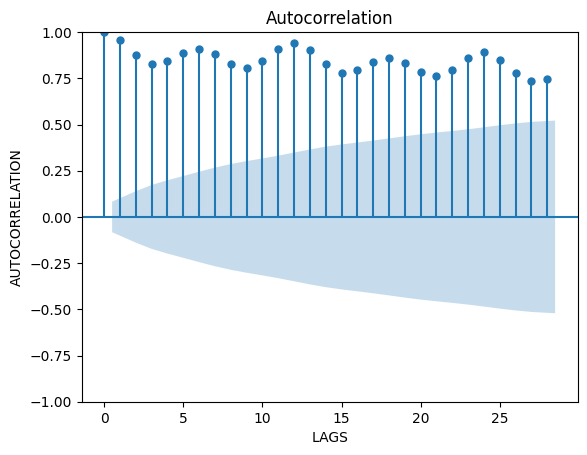

In [ ]:
plot_acf(df["Electricty_Consumption_in_TW"])
plt.xlabel("LAGS")
plt.ylabel("AUTOCORRELATION")
plt.show()

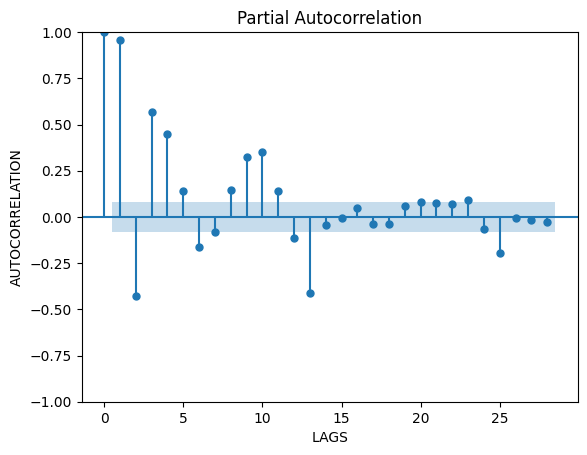

In [ ]:
plot_pacf(df["Electricty_Consumption_in_TW"])
plt.xlabel("LAGS")
plt.ylabel("AUTOCORRELATION")
plt.show()

In [ ]:
#Arima Model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df

,Electricty_Consumption_in_TW,month,year
time,,,
1973-01-01,35.9728,1,1973
1973-02-01,36.1334,2,1973
1973-03-01,35.0625,3,1973
1973-04-01,33.8416,4,1973
1973-05-01,33.5107,5,1973
...,...,...,...
2019-05-01,97.5860,5,2019
2019-06-01,110.8580,6,2019
2019-07-01,122.1014,7,2019


In [ ]:
df=df.drop(columns=['month','year'])

In [ ]:
df.head()

,Electricty_Consumption_in_TW
time,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [ ]:
df['Electricty_Consumption_in_TW'].rolling(window=2).mean()

time
1973-01-01          NaN
1973-02-01     36.05310
1973-03-01     35.59795
1973-04-01     34.45205
1973-05-01     33.67615
                ...    
2019-05-01     93.38665
2019-06-01    104.22200
2019-07-01    116.47970
2019-08-01    121.93895
2019-09-01    115.74775
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

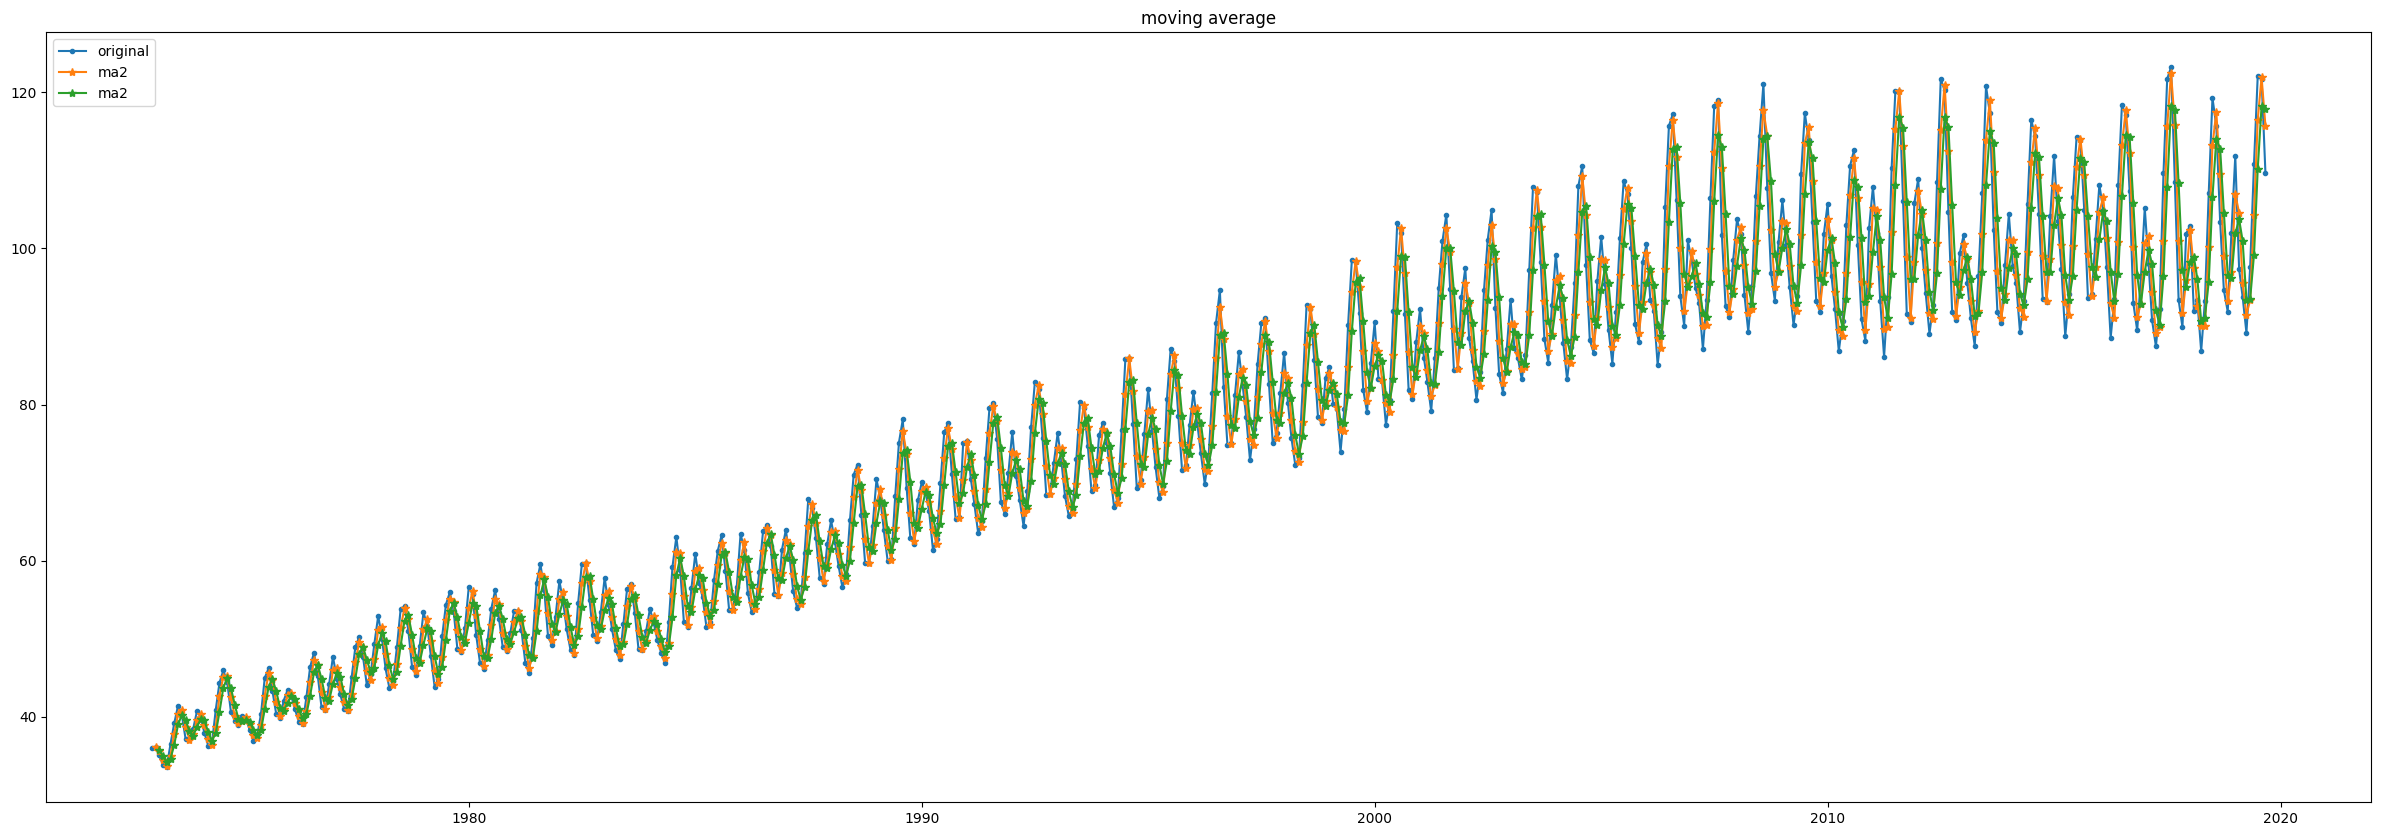

In [ ]:
# appling rolling statistics
plt.figure(figsize=(30,10))
plt.plot(df['Electricty_Consumption_in_TW'],marker='.',label='original')
plt.plot(df['Electricty_Consumption_in_TW'].rolling(window=2).mean(),marker='*',label='ma2')
plt.plot(df['Electricty_Consumption_in_TW'].rolling(window=3).mean(),marker='*',label='ma2')
plt.title('moving average')
plt.legend()
plt.show()

In [ ]:
df['Electricty_Consumption_in_TW'].ewm(alpha=0.4,adjust=False).mean()

time
1973-01-01     35.972800
1973-02-01     36.037040
1973-03-01     35.647224
1973-04-01     34.924974
1973-05-01     34.359265
                 ...    
2019-05-01     95.913841
2019-06-01    101.891505
2019-07-01    109.975463
2019-08-01    114.695878
2019-09-01    112.705127
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

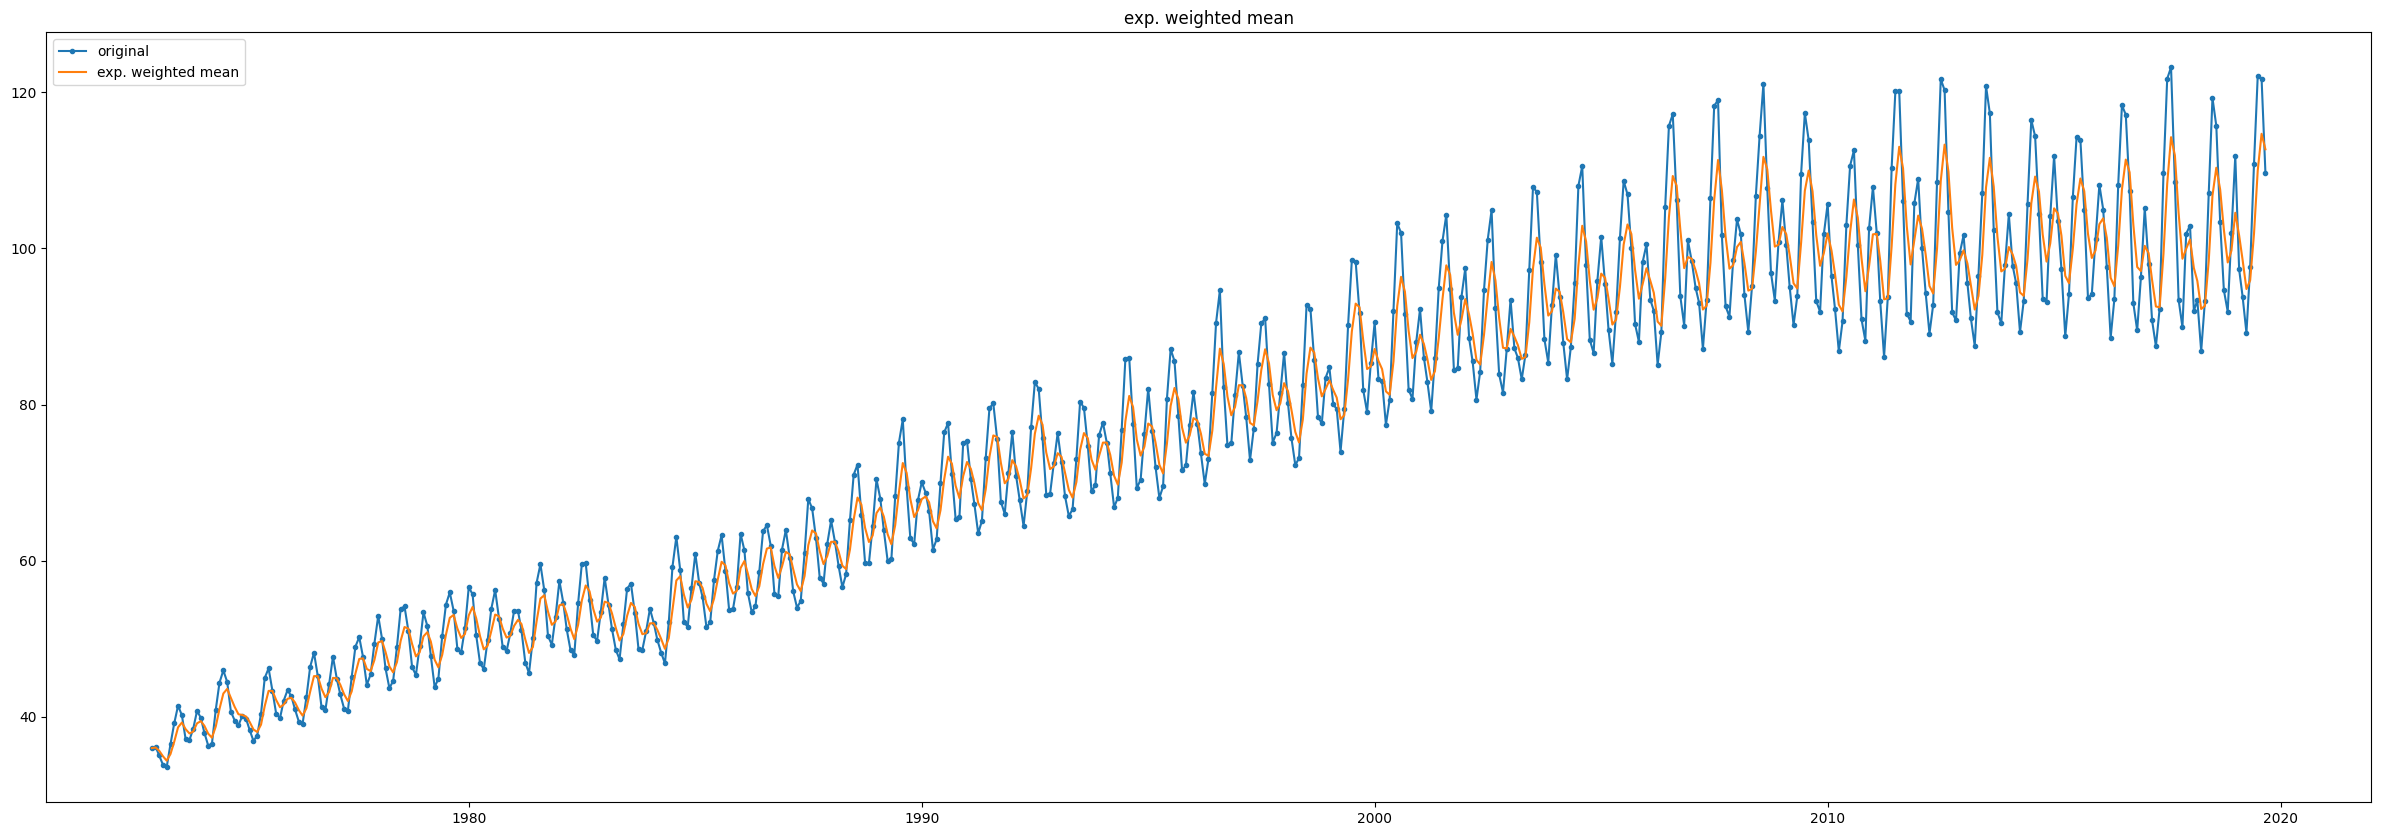

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df['Electricty_Consumption_in_TW'],marker='.',label='original')
plt.plot(df['Electricty_Consumption_in_TW'].ewm(alpha=0.4,adjust=False).mean(),label='exp. weighted mean')
plt.title('exp. weighted mean')
plt.legend()
plt.show()

In [ ]:
561*0.7

392.7

In [ ]:
train, test = df[:393], df[393:]


In [ ]:
train

,Electricty_Consumption_in_TW
time,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2005-05-01,91.8307
2005-06-01,101.3472
2005-07-01,108.6568


In [ ]:
test

,Electricty_Consumption_in_TW
time,
2005-10-01,90.3099
2005-11-01,88.0298
2005-12-01,98.2432
2006-01-01,100.5180
2006-02-01,93.4341
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [ ]:
train.shape, test.shape

((393, 1), (168, 1))

In [ ]:
model = ARIMA(train, order = (3, 3, 2 ))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
preds = model_fit.forecast(steps = len(test))

In [ ]:
preds

2005-10-01     94.663579
2005-11-01     96.129316
2005-12-01    102.247219
2006-01-01    107.001355
2006-02-01    106.227140
                 ...    
2019-05-01    141.200913
2019-06-01    141.511193
2019-07-01    141.822343
2019-08-01    142.134165
2019-09-01    142.446592
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

In [ ]:
mae  = mean_absolute_error(preds, test)
print(mae)
# very high mae need to tune arima model

20.04522187906903


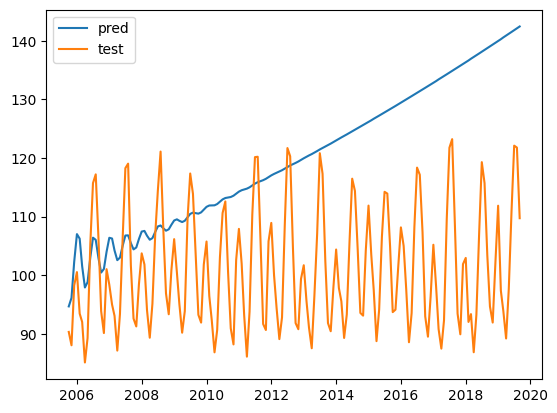

In [ ]:
plt.plot(preds, label = "pred")
plt.plot(preds.index, test, label = "test")
plt.legend()

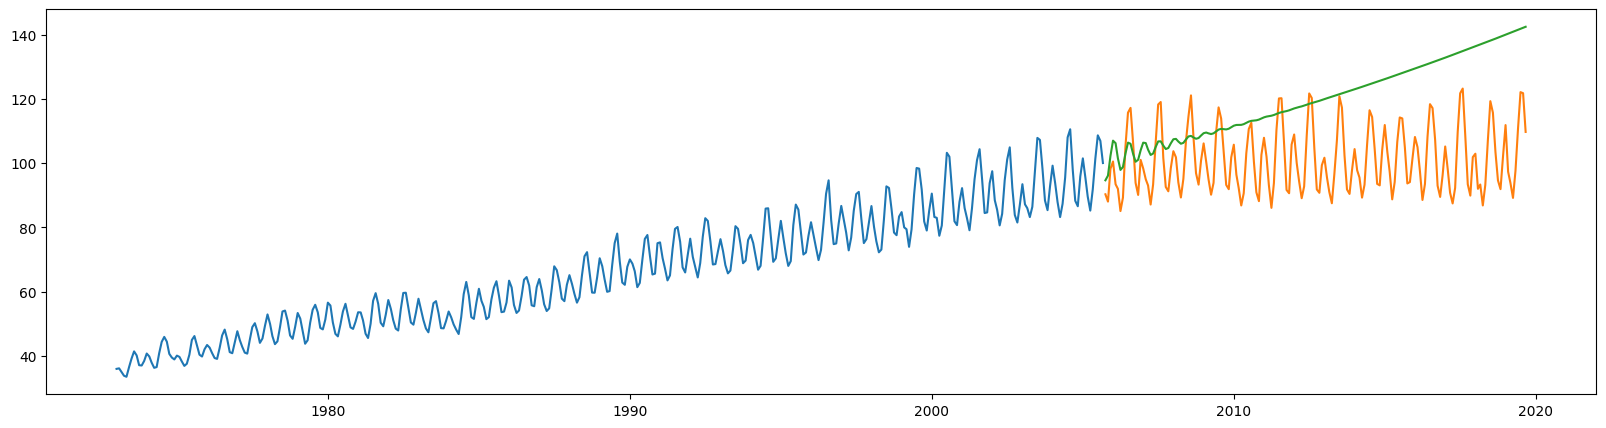

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(test)
plt.plot(test.index, preds)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#tuning Arima model with 0 to 3 range of p,d and q
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 2)

order_list,mae_list = [], []
for p in p_range:
    for d in d_range:
        for q in q_range:
            order = (p, d, q)
            model = ARIMA(train, order = order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps = len(test))
            mae = mean_absolute_error(forecast, test)
            order_list.append(order)
            mae_list.append(mae)


In [ ]:
#mae with different values of p,d,q
res = pd.DataFrame({
    "order":order_list,
    "mae":mae_list


})

res= res.sort_values(by = "mae")
res

,order,mae
11,"(2, 1, 1)",8.333650
10,"(2, 1, 0)",8.363567
2,"(0, 1, 0)",8.364086
3,"(0, 1, 1)",8.418009
7,"(1, 1, 1)",8.588212
6,"(1, 1, 0)",8.911506
4,"(1, 0, 0)",28.882574
5,"(1, 0, 1)",31.916460
9,"(2, 0, 1)",32.873601
8,"(2, 0, 0)",33.333758


In [ ]:
model = ARIMA(train, order = (2, 1, 1))
model_fit = model.fit()

In [ ]:
preds = model_fit.forecast(steps = len(test))

In [ ]:
preds

2005-10-01     93.038498
2005-11-01     91.740311
2005-12-01     96.238349
2006-01-01    101.816347
2006-02-01    103.673201
                 ...    
2019-05-01     98.475624
2019-06-01     98.475623
2019-07-01     98.475622
2019-08-01     98.475621
2019-09-01     98.475622
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

In [ ]:
mae  = mean_absolute_error(preds, test)
print(mae)

8.333650168282453


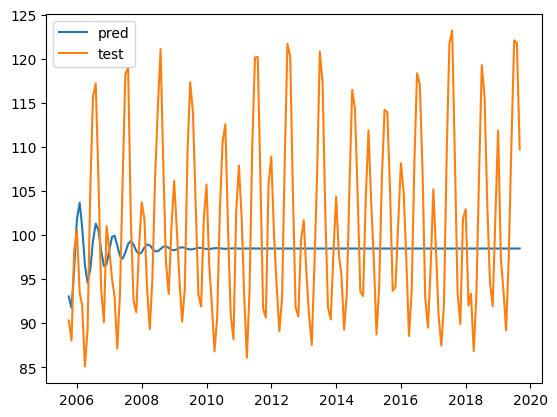

In [ ]:
plt.plot(preds, label = "pred")
plt.plot(preds.index, test, label = "test")
plt.legend()
#not getting good results bcoz arima model doesn't well when we have seasonality component .. so need to apply SARIMA model

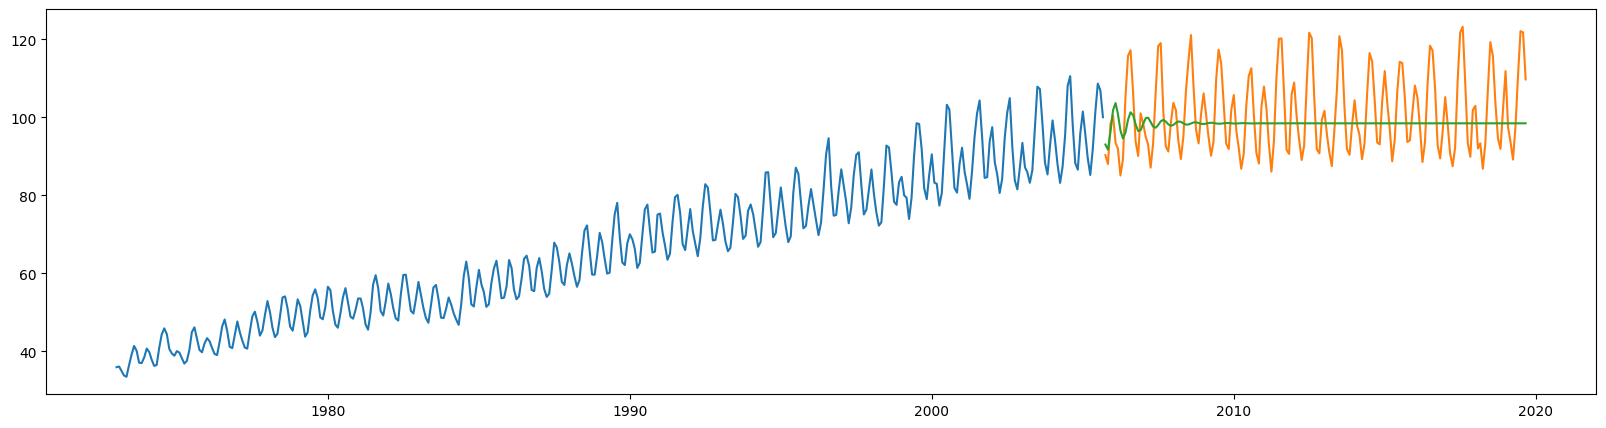

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(test)
plt.plot(test.index, preds)

**SARIMA Model**

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def auto_arima(timeseries, regressors=None, p=range(0,3), q = range(0,3), d = range(0,2),
              P=range(0,2), Q = range(0,2), D = range(0,2)):
    pdq = itertools.product(p, d, q)
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_result = None

    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                temp_model = SARIMAX(endog= train, exog=regressors,order = param, seasonal_order=seasonal_param,
                               enforce_invertibility=False, enforce_stationarity=False)

                temp_results = temp_model.fit(disp= False)
                if temp_results.aic < best_aic:  ## aic stands for akaike information coefficient # bic bayesian information coefficient
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = seasonal_param
                    best_result = temp_results
            except Exception as e:
                print("SOME ERROR HAPPENED!\n\n", e)
                continue

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_result.summary().tables[0])
    print(best_result.summary().tables[1])

In [ ]:
auto_arima(train)

Best SARIMAX(1, 1, 2)x(0, 1, 1, 12)12 model - AIC:1314.5937450901288
                                      SARIMAX Results                                       
Dep. Variable:         Electricty_Consumption_in_TW   No. Observations:                  393
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -652.297
Date:                              Fri, 01 Mar 2024   AIC                           1314.594
Time:                                      08:58:17   BIC                           1334.093
Sample:                                  01-01-1973   HQIC                          1322.343
                                       - 09-01-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3442      0.

In [ ]:
import statsmodels.api as sm
model  = sm.tsa.statespace.SARIMAX(train,
                order = (1,1,2),  #p, d, and q values
                seasonal_order =(0,1,1,12), # seasonal
                enforce_stationarity = False,
                enforce_invertibility=False

                ).fit(disp=False)

In [ ]:
preds = model.forecast(steps = len(test))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds,test)

6.227743651522916

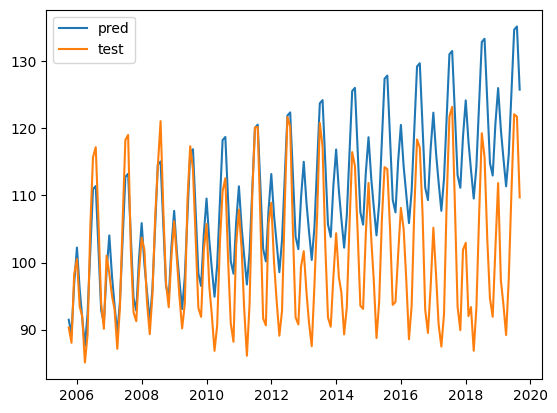

In [ ]:
plt.plot(preds, label = "pred")
plt.plot(preds.index, test, label = "test")
plt.legend()
# from the below graph we can see that our sarima model doing well bcoz it follows acutual data with some minimal error

since our model is doing well and also we are getting low mae(6.22) compared to arima so we choose SARIMA model

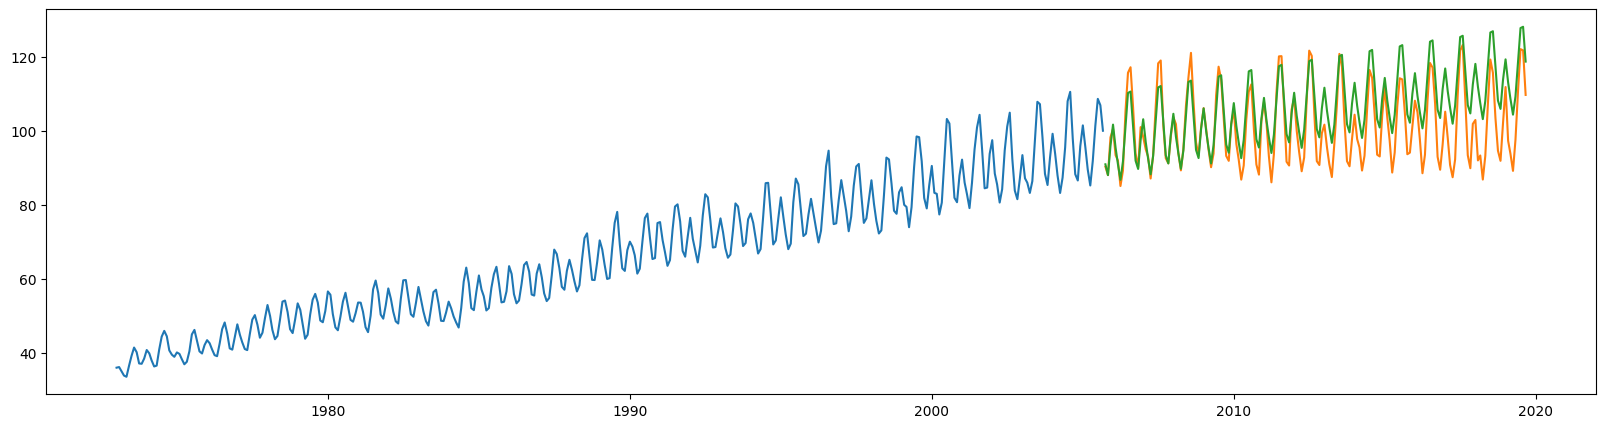

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(test)
plt.plot(test.index, preds)

In [ ]:
model.forecast()

In [ ]:
future=model.forecast(steps='2022-12-01')
future

2005-10-01     91.462233
2005-11-01     89.323180
2005-12-01     96.854743
2006-01-01    102.232339
2006-02-01     96.032716
                 ...    
2022-08-01    140.699554
2022-09-01    131.279879
2022-10-01    122.167311
2022-11-01    120.303058
2022-12-01    127.929201
Freq: MS, Name: predicted_mean, Length: 207, dtype: float64

In [ ]:
future.index = pd.to_datetime(future.index)

# Slice from 2019-10-01 onwards
future_next= future['2019-10-01':]
future_next

2019-10-01    116.674824
2019-11-01    114.810572
2019-12-01    122.436714
2020-01-01    127.846861
2020-02-01    121.658441
2020-03-01    117.490381
2020-04-01    113.203063
2020-05-01    117.987381
2020-06-01    127.560449
2020-07-01    136.562884
2020-08-01    137.037897
2020-09-01    127.618221
2020-10-01    118.505653
2020-11-01    116.641401
2020-12-01    124.267543
2021-01-01    129.677690
2021-02-01    123.489270
2021-03-01    119.321210
2021-04-01    115.033892
2021-05-01    119.818210
2021-06-01    129.391278
2021-07-01    138.393713
2021-08-01    138.868726
2021-09-01    129.449050
2021-10-01    120.336482
2021-11-01    118.472229
2021-12-01    126.098372
2022-01-01    131.508519
2022-02-01    125.320099
2022-03-01    121.152039
2022-04-01    116.864721
2022-05-01    121.649039
2022-06-01    131.222106
2022-07-01    140.224542
2022-08-01    140.699554
2022-09-01    131.279879
2022-10-01    122.167311
2022-11-01    120.303058
2022-12-01    127.929201
Freq: MS, Name: predicted

Demand estimation for next 2 years

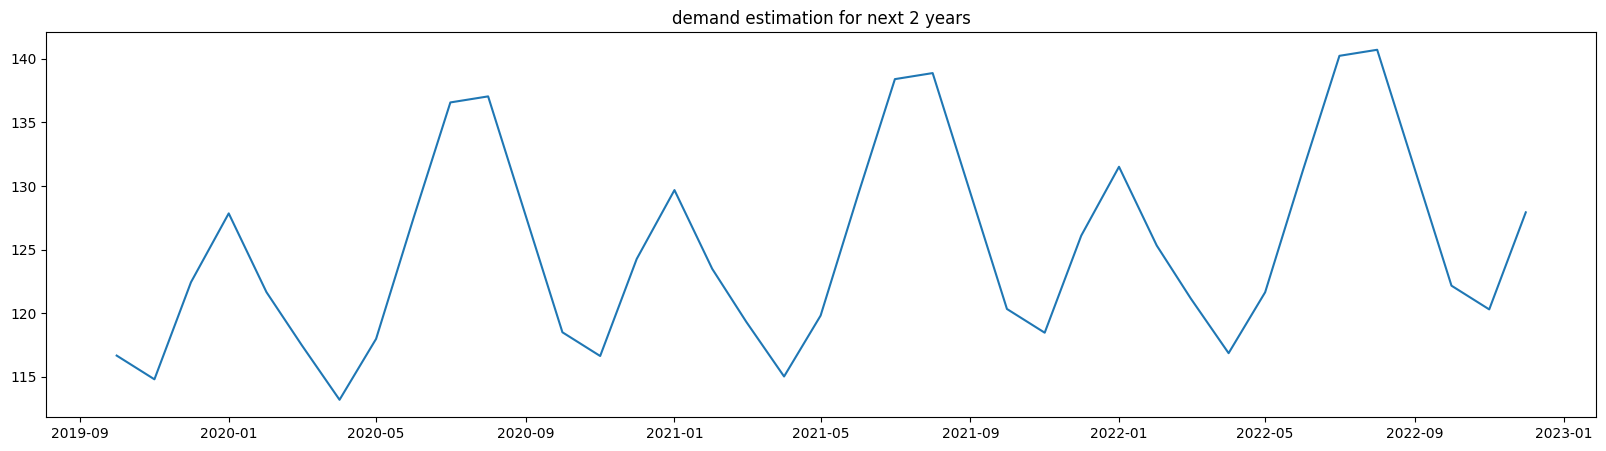

In [ ]:
plt.figure(figsize=(20,5))
plt.title('demand estimation for next 2 years')
plt.plot(future_next)
plt.show()